# Project 1: Demographics and Education
## Cleaning and Exploring Data with Pandas
## Due Date: 
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.


**Collaborators**: *list collaborators here*


## This Assignment

<img src="Data/sather_gate.jpg" style="width:600px">

Photo: Marcio Jose Sanchez, Associated Press

California has made [efforts to decrease racial disparity](https://calmatters.org/commentary/californias-school-achievement-gap-proves-persistent/) in educational attainment. Despite these efforts, [racial disparity in California high school achievement is still substantial](https://cepa.stanford.edu/educational-opportunity-monitoring-project/achievement-gaps/race/). The relationship between educational attainment and a given person's race in the United States has been cited as an explanation for the racial income gap and generational poverty.

In this project, you will investigate two datasets constructed by the California Department of Education regarding student demographics and educational attainment for public schools in the state. The main goal of this assignment is to understand the relationship between demographics and education. We will walk through various steps of exploratory data analysis to do this, and provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Applying probability sampling techniques
* Exploring characteristics and distributions of individual variables

## Score Breakdown
Question | Points
--- | ---
1a | 1
1b | 1
1c | 1
2a | 1
2b | 1
3a | 1
3b | 1
3c | 1
3d | 1
3e | 1
3f | 1
4a | 1
4b | 1
4c | 1
4d | 1
4e | 1
4f | 1
4g | 1
4h | 1
4i | 1
5a | 1
5b | 1
5c | 1
5d | 1
6a | 1
6b | 1
6c | 1
6d | 1
7a | 1
7b | 1
7c | 1
7d | 1
7e | 1
8a | 1
8b | 1
8c | 1
Total | 35

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', palette='colorblind')

---
## 1: Loading Public Schools Data

We have data, but we don't have any specific questions about the data yet, so let's focus on understanding the structure of the data. This involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

### Question 1a: Reading in the Files

Based on the above information, let's attempt to load `pubschls.txt` and `filesenr.txt` into pandas data frames with the following names: `sch` and `dem`, respectively.

In [126]:
# sch = pd.read_csv('Data/pubschls.txt', sep="\t")
# sch = sch.loc[sch['StatusType']=='Active']
# sch = sch.replace('No Data', np.NaN)
# sch = sch[['CDSCode','County','District','School','Street','City',\
#            'Zip','State','Phone','WebSite','SOC','SOCType']]

# act = pd.read_excel('Data/act18.xls')
# act = act[['cds','NumTstTakr','AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci']]

# sch = pd.merge(sch, act, left_on='CDSCode', right_on='cds', how='left')
# sch = sch.replace('*', np.NaN)
# sch = sch.set_index('CDSCode')
# sch.to_csv('Data/pubschls.csv')

# dem = pd.read_csv('Data/filesenr.txt', sep='\t')
# dem = dem[['CDS_CODE','ETHNIC','GENDER','ENR_TOTAL']]
# dem = dem.set_index('CDS_CODE')
# dem.to_csv('Data/demographics.csv')

sch = pd.read_csv('Data/pubschls.csv')
dem = pd.read_csv('Data/demographics.csv')

Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `sch` and `dem` dataframes. Use `Dataframe.describe` to learn about the numeric columns.

In [127]:
print(sch.head())
print(dem.head())

         CDSCode   County                            District  \
0  1100170000000  Alameda  Alameda County Office of Education   
1  1100170112607  Alameda  Alameda County Office of Education   
2  1100170123968  Alameda  Alameda County Office of Education   
3  1100170124172  Alameda  Alameda County Office of Education   
4  1100170125567  Alameda  Alameda County Office of Education   

                                    School                        Street  \
0                                      NaN        313 West Winton Avenue   
1   Envision Academy for Arts & Technology           1515 Webster Street   
2  Community School for Creative Education  2111 International Boulevard   
3                          Yu Ming Charter          1086 Alcatraz Avenue   
4                 Urban Montessori Charter             5328 Brann Street   

      City         Zip State           Phone  \
0  Hayward  94544-1136    CA  (510) 887-0152   
1  Oakland  94612-3355    CA  (510) 596-8901   
2  Oakla

The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [128]:
print(sch.describe())
print(act.describe())

            CDSCode           SOC           cds    NumTstTakr    AvgScrEng  \
count  1.176000e+04  10655.000000  2.114000e+03   2114.000000  1434.000000   
mean   2.942944e+13     60.044017  2.919304e+13     94.595080    21.165272   
std    1.428559e+13     11.618095  1.436404e+13    301.218424     3.935615   
min    1.100170e+12      8.000000  1.100170e+12      0.000000    10.000000   
25%    1.964733e+13     60.000000  1.964725e+13      6.000000    18.000000   
50%    3.066670e+13     60.000000  3.066621e+13     40.000000    21.000000   
75%    3.868479e+13     65.000000  3.868478e+13    102.750000    24.000000   
max    5.872770e+13     98.000000  5.872770e+13  11607.000000    32.000000   

        AvgScrRead   AvgScrMath    AvgScrSci  
count  1434.000000  1434.000000  1434.000000  
mean     21.994421    21.437238    21.216876  
std       3.504155     3.251802     3.095091  
min      11.000000    14.000000    12.000000  
25%      19.000000    19.000000    19.000000  
50%      22.000

Now, we perform some sanity checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these cells).

First, we check the basic structure of the data frames you created:

In [129]:
sch.columns

Index(['CDSCode', 'County', 'District', 'School', 'Street', 'City', 'Zip',
       'State', 'Phone', 'WebSite', 'SOC', 'SOCType', 'cds', 'NumTstTakr',
       'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci'],
      dtype='object')

In [132]:
assert all(sch.columns == ['CDSCode', 'County', 'District', 'School', 'Street', 'City', 'Zip',
       'State', 'Phone', 'WebSite', 'SOC', 'SOCType', 'cds', 'NumTstTakr',
       'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci'])
assert 11760 <= len(sch) <= 11760

assert all(dem.columns == ['CDS_CODE', 'ETHNIC', 'GENDER', 'ENR_TOTAL'])
assert 130220 <= len(dem) <= 130220

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data.

In [131]:
sch_summary = pd.DataFrame(**{'columns': ['CDSCode', 'cds', 'NumTstTakr'],
 'data': {'CDSCode': {'50%': 3.066670e+13, 'max': 5.872770e+13, 'min': 1.100170e+12},
  'cds': {'50%': 3.066621e+13, 'max': 5.872770e+13, 'min': 1.100170e+12},
  'NumTstTakr': {'50%': 40.000000,
   'max': 11607.000000,
   'min': 0.000000}},
 'index': ['min', '50%', 'max']})

dem_summary = pd.DataFrame(**{'columns': ['CDS_CODE', 'ETHNIC', 'ENR_TOTAL'],
 'data': {'CDS_CODE': {'50%': 3.166911e+13, 'max':  5.872770e+13, 'min': 1.100170e+12},
 'ETHNIC': {'50%': 5.000000, 'max': 9.000000, 'min': 0.000000},
 'ENR_TOTAL': {'50%': 8.000000, 'max': 2031.000000, 'min': 0.000000}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(sch_summary)
print('What we expect from your Inspections dataframe:')
display(dem_summary)

What we expect from your Businesses dataframe:


,CDSCode,cds,NumTstTakr
min,1.100170e+12,1.100170e+12,0.0
50%,3.066670e+13,3.066621e+13,40.0
max,5.872770e+13,5.872770e+13,11607.0


What we expect from your Inspections dataframe:


,CDS_CODE,ETHNIC,ENR_TOTAL
min,1.100170e+12,0.0,0.0
50%,3.166911e+13,5.0,8.0
max,5.872770e+13,9.0,2031.0


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your dataframe are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding error can cause spurious failures.

### Question 1b: Verifying the data

Now let's run the automated tests. If your dataframes are correct, then the following cell will seem to do nothing, which is a good thing! However, if your variables don't match the correct answers in the main summary statistics shown above, an exception will be raised.

In [133]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""


def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """    
    # summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    return np.allclose(act, des, rtol)

### Question 1c: Identifying Issues with the Data

Use the `head` command on your three files again. This time, describe in two to three sentences at least one potential problem with the data you see. Consider issues with missing values and bad data.

In [134]:
sch.head()

,CDSCode,County,District,School,Street,City,Zip,State,Phone,WebSite,SOC,SOCType,cds,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci
0,1100170000000,Alameda,Alameda County Office of Education,NaN,313 West Winton Avenue,Hayward,94544-1136,CA,(510) 887-0152,www.acoe.org,NaN,NaN,1.100170e+12,16.0,20.0,19.0,20.0,20.0
1,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,Oakland,94612-3355,CA,(510) 596-8901,www.envisionacademy.org/,66.0,High Schools (Public),1.100170e+12,16.0,20.0,19.0,20.0,20.0
2,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,Oakland,94606-4903,CA,(510) 686-4131,www.communityschoolforcreativeeducation.org,60.0,Elementary Schools (Public),NaN,NaN,NaN,NaN,NaN,NaN
3,1100170124172,Alameda,Alameda County Office of Education,Yu Ming Charter,1086 Alcatraz Avenue,Oakland,94608-1265,CA,(510) 452-2063,www.yumingschool.org,60.0,Elementary Schools (Public),NaN,NaN,NaN,NaN,NaN,NaN
4,1100170125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,5328 Brann Street,Oakland,94619-3312,CA,(510) 842-1181,www.urbanmontessori.org,60.0,Elementary Schools (Public),NaN,NaN,NaN,NaN,NaN,NaN


**SOLUTION:**  

*There appears to be a missing school name for CDS 1100170000000. There are also lots of schools that are missing relevant ACT Score data. You can see that the issue is in that the dataset contains non-highschools.*

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the pubschls file, which has been read into the `sch` dataframe.

---
## 2: Examining the Public Schools Data

From its name alone, we expect the `pubschls.csv` file to contain information about the public schools in the state of California. Let's investigate the granularity of this dataset.

### Question 2a

Examining the entries in `sch`, is the `CDSCode` (this 14-digit code is the official, unique identification of a school within California) unique for each record? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `CDSCode` series has any duplicates.

In [56]:
is_school_id_unique = True not in (sch['CDSCode'].value_counts() != 1)
is_school_id_unique

True

### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. What does each record represent?  
1. What is the primary key?
1. What would you find by grouping by the following columns: `CDSCode`, `Zip`, `State`?

Please write your answer in the markdown cell below. You may create new cells below your answer to run code, but **please never add cells between a question cell and the answer cell below it.**

**SOLUTION**:  

1. *Each record represents an instance of registered public school.*
2. *CDSCode*
3. *With CDSCode, we would find the same table as the original schools table because it appears that CDSCode is unique to each school. With Zip, we would find instances sharing the same postal code appear together under the same group, though it sounds unlikely that we would find such a case. With State, we would find schools located in the same state.*

---
## 3: SOC Types and Zip Codes

Next, let's  explore some of the variables in the schools table. We begin by examining the SOC Types (the text description of the type of school).

### Question 3a

Answer the following questions about the `SOC Type` column in the `sch` data frame?  
1. Are SOC Types quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. What data type is used to represent a SOC Type?

**Solution:**

1. *SOC Types are qualitative and nominal.*
2. *String data type.*

### Question 3b

How many schools are in each school type? 

In the cell below, create a series where the index is the school and the value is the number of records with that school type in descending order of count. `Elementary Schools (Public)` should be on the top with 5664 records.

In [57]:
type_counts = sch.groupby('SOCType').size().sort_values(ascending=False)
type_counts.head()

SOCType
Elementary Schools (Public)             5664
High Schools (Public)                   1314
Intermediate/Middle Schools (Public)    1289
Continuation High Schools                438
K-12 Schools (Public)                    368
dtype: int64

Did you take into account that some schools have missing SOC Types?

In [58]:
print('zip_counts describes', sum(type_counts), 'records.')
print('The original data have', len(sch), 'records')

zip_counts describes 10655 records.
The original data have 11760 records


Missing data is extremely common in real-world data science projects. There are several ways to include missing school types in the `type_counts` series above. One approach is to use the `fillna` method of the series, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, we picked "No Data". When you run the code below, you should see that there are 1105 schools with no school type information.

In [59]:
type_counts = sch.fillna("No Data").groupby("SOCType").size().sort_values(ascending=False)
type_counts.head(15)

SOCType
Elementary Schools (Public)                  5664
High Schools (Public)                        1314
Intermediate/Middle Schools (Public)         1289
No Data                                      1105
Continuation High Schools                     438
K-12 Schools (Public)                         368
Adult Education Centers                       297
Alternative Schools of Choice                 270
Elemen Schools In 1 School Dist. (Public)     229
District Community Day Schools                183
Special Education Schools (Public)            154
Preschool                                     152
County Community                               77
ROC/ROP                                        69
Juvenile Court Schools                         62
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [60]:
sch["SOCType"].value_counts(dropna=False).sort_values(ascending = False).head(15)

Elementary Schools (Public)                  5664
High Schools (Public)                        1314
Intermediate/Middle Schools (Public)         1289
NaN                                          1105
Continuation High Schools                     438
K-12 Schools (Public)                         368
Adult Education Centers                       297
Alternative Schools of Choice                 270
Elemen Schools In 1 School Dist. (Public)     229
District Community Day Schools                183
Special Education Schools (Public)            154
Preschool                                     152
County Community                               77
ROC/ROP                                        69
Juvenile Court Schools                         62
Name: SOCType, dtype: int64

### Question 3c : A Closer Look at Missing School Types

Let's look more closely at records with missing `SOC Types`. Describe the pattern among records have missing school types. What can you conclude about schools that are missing `SOC Types` but have information on average ACT Scores? Also Pay attention to their school names.

*Hint*: The `isnull` method of a series returns a boolean series which is true only for entries in the original series that were missing.

In [15]:
sch.loc[sch['SOCType'].isnull()].sample(5)

,CDSCode,County,District,School,Street,City,Zip,State,Phone,WebSite,SOC,SOCType,cds,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci
9672,43693850000000,Santa Clara,Cambrian,NaN,4115 Jacksol Drive,San Jose,95124-3312,CA,(408) 377-2103,www.cambriansd.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10962,51713990000000,Sutter,Live Oak Unified,NaN,2201 Pennington Road,Live Oak,95953-2469,CA,(530) 695-5400,www.lousd.k12.ca.us,NaN,NaN,5.171399e+13,30.0,23,23,23,22
11043,52715300000000,Tehama,Flournoy Union Elementary,NaN,15850 Paskenta Road,Flournoy,96029-2260,CA,(530) 833-5331,www.flournoyschool.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7317,36676370000000,San Bernardino,Bear Valley Unified,NaN,42271 Moonridge Road,Big Bear Lake,92315-1529,CA,(909) 866-4631,www.bearvalleyusd.org,NaN,NaN,3.667637e+13,22.0,23,24,24,24
7793,36739570000000,San Bernardino,Snowline Joint Unified,NaN,4075 Nielson Road,Phelan,92329-6000,CA,(760) 868-5817,www.snowlineschools.com,NaN,NaN,3.673957e+13,55.0,22,23,24,23


**Solution:**

*It appears that schools missing `SOC Types` information are also missing information on actual names of the schools. However, it appears that a significant portion of schools missing `SOC Types` information contains information on average SAT scores, which makes it reasonable to infer that these are high schools.*

### Question 3d

The aim of the project is to compare school demographics with scores of standardized test administered only to high school students. Based on your observation above, is it reasonable to include schools that one of the `SOC types` comparable to a high school (the list is given below as SOCLIST)? Does it also make sense to include schools that we have information on average ACT Scores on?

Using both filtering methods described above, assign `sch` to a new dataframe that has the same columns but only the rows that fall into the schools that we're interested in. In the real world, filtering our postal codes in this way may not be ideal. (Fortunately, this is just a course assignment.)

*Hint*: The `notna()` method of a series returns a boolean series which is true only for entries in the original series that were not missing.

*Hint*: The `isin()` method of a series returns a boolean series which is true only for entries in the original series that overlap with a list passed in as a parameter.

In [61]:
SOCLIST = ['High Schools (Public)', 'Continuation High Schools', 'K-12 Schools (Public)' \
          'Alternative Schools of Choice', 'Special Education Schools (Public)', 'Juvenile Court Schools']

sch = sch.loc[(sch['AvgScrRead'].notna()) | (sch['SOCType'].isin(SOCLIST))]
sch.head()

,CDSCode,County,District,School,Street,City,Zip,State,Phone,WebSite,SOC,SOCType,cds,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci
0,1100170000000,Alameda,Alameda County Office of Education,NaN,313 West Winton Avenue,Hayward,94544-1136,CA,(510) 887-0152,www.acoe.org,NaN,NaN,1.100170e+12,16.0,20,19,20,20
1,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,Oakland,94612-3355,CA,(510) 596-8901,www.envisionacademy.org/,66,High Schools (Public),1.100170e+12,16.0,20,19,20,20
6,1100170130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,2500 Fairmont Avenue,San Leandro,94578-1005,CA,(510) 670-7609,www.acoe.org,14,Juvenile Court Schools,NaN,NaN,NaN,NaN,NaN,NaN
14,1100176106751,Alameda,Alameda County Office of Education,Alameda County Special Education,313 West Winton Avenue,Hayward,94544-1136,CA,(510) 723-3857,www.acoe.org,09,Special Education Schools (Public),NaN,NaN,NaN,NaN,NaN,NaN
18,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,39350 Gallaudet Drive,Fremont,94538-2308,CA,(510) 794-3666,www.csdeagles.com,31,State Special Schools,1.316170e+12,26.0,12,15,15,16


### Question 3e : Zip Codes

Missing school types aren't our only problem. There are also some records where the postal code is wrong, e.g., there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting or replacing the old values in the `Zip` columnm, we'll instead create a new column called `Zip_5`.

The reason we're making a new column is that it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [62]:
sch['Zip_5'] = sch['Zip'].str[:5]
sch.head()

,CDSCode,County,District,School,Street,City,Zip,State,Phone,WebSite,SOC,SOCType,cds,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,Zip_5
0,1100170000000,Alameda,Alameda County Office of Education,NaN,313 West Winton Avenue,Hayward,94544-1136,CA,(510) 887-0152,www.acoe.org,NaN,NaN,1.100170e+12,16.0,20,19,20,20,94544
1,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,Oakland,94612-3355,CA,(510) 596-8901,www.envisionacademy.org/,66,High Schools (Public),1.100170e+12,16.0,20,19,20,20,94612
6,1100170130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,2500 Fairmont Avenue,San Leandro,94578-1005,CA,(510) 670-7609,www.acoe.org,14,Juvenile Court Schools,NaN,NaN,NaN,NaN,NaN,NaN,94578
14,1100176106751,Alameda,Alameda County Office of Education,Alameda County Special Education,313 West Winton Avenue,Hayward,94544-1136,CA,(510) 723-3857,www.acoe.org,09,Special Education Schools (Public),NaN,NaN,NaN,NaN,NaN,NaN,94544
18,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,39350 Gallaudet Drive,Fremont,94538-2308,CA,(510) 794-3666,www.csdeagles.com,31,State Special Schools,1.316170e+12,26.0,12,15,15,16,94538


### Question 3f: Filtering ZIP Codes

Let's set up a list of all San Francisco ZIP codes and use it to access information on schools located in San Francisco.

In [18]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

In [19]:
sf_sch = sch.loc[sch['Zip_5'].isin(all_sf_zip_codes)]
sf_sch.head()

,CDSCode,County,District,School,Street,City,Zip,State,Phone,WebSite,SOC,SOCType,cds,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,Zip_5
8737,38684780000000,San Francisco,San Francisco Unified,NaN,555 Franklin Street,San Francisco,94102-5207,CA,(415) 241-6000,www.sfusd.edu,NaN,NaN,3.868478e+13,1304.0,21,21,22,21,94102
8741,38684780102103,San Francisco,San Francisco Unified,Jordan (June) School for Equity,325 La Grande Avenue,San Francisco,94112-2866,CA,(415) 452-4922,www.sfusd.edu,63,Alternative Schools of Choice,3.868478e+13,34.0,15,17,17,17,94112
8757,38684780119875,San Francisco,San Francisco Unified,S.F. International High,655 DeHaro St,San Francisco,94107-2727,CA,(415) 695-5781,www.sfusd.edu,63,Alternative Schools of Choice,3.868478e+13,48.0,12,13,17,15,94107
8763,38684780127530,San Francisco,San Francisco Unified,KIPP San Francisco College Preparatory,1195 Hudson Avenue,San Francisco,94124-2488,CA,(415) 643-6951,www.kippbayarea.org/schools/sfcollegeprep,66,High Schools (Public),3.868478e+13,90.0,19,18,19,19,94124
8768,38684783830205,San Francisco,San Francisco Unified,Wallenberg (Raoul) Traditional High,40 Vega Street,San Francisco,94115-3826,CA,(415) 749-3469,NaN,66,High Schools (Public),3.868478e+13,33.0,22,21,23,22,94115


---
## 4: Sampling from the Schools Data
We can now sample from the business data using the cleaned ZIP code data. Make sure to use `Zip_5` instead of `Zip` for all parts of this question.

### Question 4a

First, complete the following function `sample`, which takes as arguments a series, `series`, and a sample size, `n`, and returns a simple random sample (SRS) of size `n` from the series. Recall that in SRS, sampling is performed **without** replacement. The result should be a **list** of the `n` values that are in the sample.

*Hint*: Consider using [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.choice.html).

In [20]:
def sample(series, n):
    # Do not change the following line of code in any way!
    # In case you delete it, it should be "np.random.seed(40)"
    np.random.seed(40)
    
    return series.sample(n).tolist()

### Question 4b
Suppose we take a SRS of 5 schools from the public schools data. What is the probability that the school named *Sierra Vista High* is in the sample?

In [21]:
q4b_answer = 1 - ((len(sch)-1)/len(sch) * (len(sch)-2)/(len(sch)-1) * \
                  (len(sch)-3)/(len(sch)-2) * (len(sch)-4)/(len(sch)-3) * \
                  (len(sch)-5)/(len(sch)-4)) # SOLUTION
q4b_answer

0.0034867503486750717

### Question 4c
Collect a stratified random sample of school names, where each stratum consists of a postal code. Collect one school name per stratum. Assign `sch_strat_sample` to a series of business names selected by this sampling procedure.

Hint: You can use the `sample` function you defined earlier.

In [22]:
sch_strat_sample = sch.groupby('Zip_5')['School'].agg(lambda x: sample(x, 1)[0]) # SOLUTION
sch_strat_sample.head()

Zip_5
90001                                      Animo Pat Brown
90002                       David Starr Jordan Senior High
90003    Alliance Judy Ivie Burton Technology Academy High
90004                                 Camino Nuevo High #2
90005                         Ambassador-Global Leadership
Name: School, dtype: object

### Question 4d

What is the probability that *Sierra Vista High* is selected as part of this stratified random sampling procedure?

In [23]:
# BEGIN SOLUTION NO PROMPT
zip_code = sch.loc[sch['School'] == 'Sierra Vista High', 'Zip_5'].iloc[0] # SOLUTION
# END SOLUTION
q4d_answer = 1 / len(sch[sch['Zip_5'] == zip_code]) # SOLUTION
q4d_answer

0.3333333333333333

### Question 4e
Collect a cluster sample of school codes, where each cluster is a postal code, with 5 clusters in the sample. Assign `sch_cluster_sample` to a series of school codes selected by this sampling procedure.

Hint: Consider using [`isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html).

In [24]:
sch_cluster_sample = sch[sch['Zip_5'].isin\
                         (np.random.choice(sch['Zip_5'].unique(),\
                          size=5,replace=False))]['CDSCode'] # SOLUTION
sch_cluster_sample.head()

2930    19647330102541
2939    19647330106864
2948    19647330106997
2998    19647330111583
3018    19647330114850
Name: CDSCode, dtype: int64

### Question 4f
What is the probability that *Sierra Vista High* is selected as part of this cluster sampling procedure?

In [25]:
q4f_answer = 5 / len(sch['Zip_5'].unique()) # SOLUTION
q4f_answer

0.006195786864931847

### Question 4g
In the context of this question, what are the benefit(s) of performing stratified sampling over cluster sampling? Why would you consider performing cluster sampling instead of stratified sampling? Compare the strengths and weaknesses of both sampling techniques.

**SOLUTION:**  
Stratified sampling could help ensure representation by including data from ZIP codes that are less common; however, collecting data from such areas could be costly. Cluster sampling is simpler and it could be cheaper to collect data from all schools in a smaller number of areas. However, estimators from cluster sampling tend to be more variable.

### Question 4h
Collect a multi-stage sample. First, take a SRS of 5 postal codes. Then, collect an SRS of one business name per selected postal code. Assign `bus_multi_sample` to a series of names selected by this procedure.

In [26]:
np.random.seed(40) # Do not touch this!

sch_multi_sample = sch[sch['Zip_5'].\
                       isin(np.random.choice(sch['Zip_5'].\
                       unique(),size=5,replace=False))].groupby('Zip_5')\
                       ['School'].agg(lambda x: sample(x, 1)[0]) # SOLUTION
sch_multi_sample.head()

Zip_5
90007    Thirty-Second Street USC Performing Arts
91701                       Rancho Cucamonga High
91761                                 Colony High
95376                                  Tracy High
95820                     Sacramento Charter High
Name: School, dtype: object

### Question 4i
What is the probability that *Sierra Vista High* is chosen in the multi-stage sample?

In [27]:
q4i_answer = q4d_answer * q4f_answer # SOLUTION
q4i_answer

0.0020652622883106154

---
## 5: ACT Scores

Let's also consider schools' average ACT Math scores and get a sense of how many are missing.

### Question 5a

How many schools are missing ACT Math Scores?

*Hint*: Use `isnull`.

In [63]:
num_missing_web = sch['AvgScrMath'].isnull().sum()
num_missing_web

990

As a somewhat contrived exercise in data manipulation, let's try to identify which ZIP codes have the most average ACT Math score records.

In the cell below, create a series where the index is `Zip_5`, and the value is the number of businesses with missing ACT Math Scores in that ZIP code. Your series should be in descending order.

*Hint: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.*

In [64]:
def null_act_count(series):
    return series['AvgScrMath'].isnull().sum()

missing_per_zip = sch.set_index('Zip_5').groupby('Zip_5').\
agg(lambda x: null_act_count(x))['AvgScrMath'].sort_values(ascending=False)
missing_per_zip.head()

Zip_5
93230    7
92111    6
93703    5
93277    5
94533    5
Name: AvgScrMath, dtype: int64

### Question 5b

Let's look at the distribution of ACT scores. As we saw before when we called `head` on this data frame, average ACT scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the ACT score. Make a bar plot of the counts of the number of schools receiving each score. 

<img src="Data/actdist.png" style="width:600px">

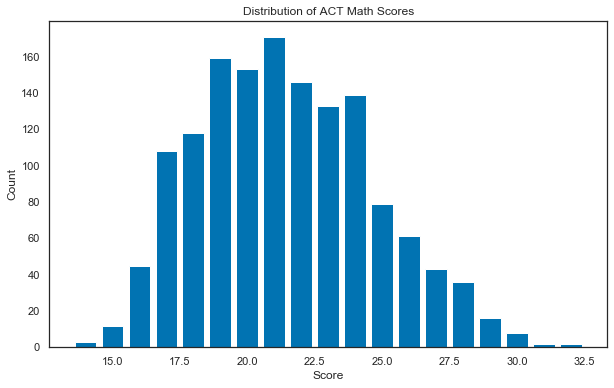

In [142]:
sch_score_count = sch['AvgScrMath'].dropna().astype('int').\
value_counts().sort_values('index')

plt.figure(figsize=(10,6))

plt.bar(sch_score_count.index, height=sch_score_count)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of ACT Math Scores');

# plt.savefig('Data/actdist.png')

### Question 5c

Describe the qualities of the distribution of the ACT scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

### Question 5d

Let's figure out which schools had the highest ACT Math scores. Construct a dataframe of five schools in the dataset that had the highest average ACT Math scores. Include only the school name and the average score and make sure to drop non-numerical records in the `AvgScrMath` column.

In [31]:
sch.sort_values(by='AvgScrMath', ascending=False)[['School','AvgScrMath']].head()

,School,AvgScrMath
9804,Lynbrook High,32
102,Mission San Jose High,32
9805,Monta Vista High,31
9849,Saratoga High,31
100,Irvington High,30


Using this data frame, identify the school with the highest average ACT Math score. Look up the school name and copy and paste anything interesting you want to share about the school.

**SOLUTION:** 

"Lynbrook High School is a comprehensive public high school serving approximately 1,820 students, grades 9-12, in suburban West San Jose. Opened in 1965 and named for the neighborhood in which it is located, Lynbrook was the fifth school in the Fremont Union High School District and one of three schools the district established during the 1960s. Beginning in the 1970s (not long after Lynbrook opened its doors), FUHSD graduates were instrumental in developing computer technologies that transformed the region into what we now know as the Silicon Valley. Lynbrook’s history is thus closely connected to some of the most profound social and technological developments of our time."

## Summary of the Schools Data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the cds code is unique across records and so we may be able to use it as a key in joining tables. 
* We found that there are some errors with the ZIP codes and school type records. In practive, however, we could take the time to look up the schools online and fix these errors.   
* We found that there are a huge number of missing average ACT scores. Fixing would require a lot of work, but could in principle be automated for well-formed data. 

---
## 6: Investigate the Demographics Data

Let's now turn to the demographics DataFrame. In this section, we determine the granularity of `dem` and investigate the kinds of information provided for school demographics. Let's start by looking again at the first 5 rows of `dem` to see what we're working with.

In [32]:
dem.head()

,CDS_CODE,ETHNIC,GENDER,ENR_TOTAL
0,6615986003495,5,F,163
1,6615986003495,1,F,3
2,6615986003495,9,M,2
3,6615986003495,7,M,45
4,6615986003495,5,M,179


### Question 6a
From calling `head`, we know that each row in this table corresponds to a single gender and race. Let's get a sense of the total number of observations, as well as the total number of unique schools that occur in the dataset.

In [33]:
# The number of rows in ins
rows_in_table  = dem.shape[0]
print(rows_in_table)

# The number of unique business IDs in ins.
unique_dem_ids = dem['CDS_CODE'].value_counts().shape[0]
print(unique_dem_ids)

130220
10521


### Question 6b

Next, we examine the Series in the `dem` dataframe called `ETHNIC`. From examining the first few rows of `ETHNIC`, we see that `ETHNIC` is a integer column, presumably representing some ethnic category. What values does this column take? How many occurrences of each value is in the DataFrame? What are the implications for further analysis? 

Refer to https://www.cde.ca.gov/ds/sd/sd/fsenr.asp for explanations on the file structure. For instance, the website specifies ethnicity that corresponds to each integer as below:

    Code 0 = Not reported
    Code 1 = American Indian or Alaska Native, Not Hispanic
    Code 2 = Asian, Not Hispanic
    Code 3 = Pacific Islander, Not Hispanic
    Code 4 = Filipino, Not Hispanic
    Code 5 = Hispanic or Latino
    Code 6 = African American, not Hispanic
    Code 7 = White, not Hispanic
    Code 9 = Two or More Races, Not Hispanic

In [34]:
pd.value_counts(dem['ETHNIC'])

5    20416
7    19731
6    16917
2    16069
9    15479
4    13364
1    10277
3     9018
0     8949
Name: ETHNIC, dtype: int64

**SOLUTION:**  
The column values range from 0 to 9, each corresponding to a specific ethnic group such as Asian or Filipino. The most common type found is the Hispanic or Latino category, and the least common is the Not Reported category.

### Question 6c

Let's now count the proportion of each ethnic group for every school.

Create a new dataframe of counts of the ethnic/gender category and proportion of that group, storing the result in `fraction_ethnic_df`. It should have an index called `CDS_CODE` and should also have 3 columns:

1. `ethnic`: The ethnic group of interest.
2. `count`: The number of students belonging to the specified ethnic group.
3. `fraction_count`: The fraction of students belonging to the specified ethnic group.

**Note that the gender column is no longer present.** This means that each row should represent ethnicity and combine the two gender categories. Your data frame should be sorted by the fraction count in descending order.

Recommended approach: Build a new dataframe with total number of students for each school and join the table with elements of the the original `dem` dataframe. From there, you can extend the resulting table to compute the fraction of the given ethnic group. This will require some new syntax you may not have seen.

*Hint*: You can use the divison operator to compute the ratio of two series.

In [37]:
total_students = pd.DataFrame(dem.groupby('CDS_CODE').sum()['ENR_TOTAL'])
total_students.columns = ['count_total']

combined_gender = dem.groupby(['CDS_CODE', 'ETHNIC']).sum().reset_index()

new_table = combined_gender.join(total_students, on='CDS_CODE')
new_table['fraction_count'] = new_table['ENR_TOTAL'] / new_table['count_total']
new_table = new_table.set_index('CDS_CODE')
new_table = new_table.drop('count_total',axis=1)
new_table.columns = ['ethnic','count','fraction_count']
new_table.head()

,ethnic,count,fraction_count
CDS_CODE,,,
1100170112607,1,3,0.007792
1100170112607,2,6,0.015584
1100170112607,3,4,0.010390
1100170112607,4,1,0.002597
1100170112607,5,217,0.563636


### Question 6d

Let's start by creating a new dataframe called `dem_named`. It should be exactly the same as `dem`, except that it should have the school name, 5 digit ZIP and average ACT Math Score of every school, as determined by the `sch` dataframe. If a `CDS_CODE` in `dem` does not exist in `sch`, the school name, ZIP and average ACT Math score should be given as NaN. 

Find the names of five schools with the highest fraction of male, Hispanic students (Ethnic code 5) **only considering schools with at least 10 students!**. Repeat the same exercise with male, Asian students and comment on the differences you observe. Specifically, how do `count` and `fraction_count` columns differ in the two tables?

*Hint: Use the merge method to join the `dem` dataframe with the appropriate portion of the `sch` dataframe.*

In [95]:
new_table_2 = pd.merge(new_table, sch[['CDSCode','School','AvgScrMath']], \
                       left_on='CDS_CODE', right_on='CDSCode', how='left')
hisp = new_table_2.loc[(new_table_2['ethnic']==5) & (new_table_2['count']>10)]
hisp.sort_values(by='fraction_count', ascending=False).dropna().head()

,ethnic,count,fraction_count,CDSCode,School,AvgScrMath
18563,5,766,0.994805,1.964733e+13,Linda Esperanza Marquez High A Huntington Park...,17
9726,5,3014,0.994391,1.363099e+13,Calexico High,21
17745,5,435,0.993151,1.964733e+13,Alliance Morgan McKinzie High,16
18569,5,668,0.992571,1.964733e+13,Linda Esperanza Marquez High C School of Socia...,17
18142,5,399,0.992537,1.964733e+13,East Los Angeles Renaissance Academy at Esteba...,17


Repeating the same exercise for male, Asian students (Ethnic code 2).

In [96]:
asian = new_table_2.loc[(new_table_2['ethnic']==2) & (new_table_2['count']>10)]
asian.sort_values(by='fraction_count', ascending=False).dropna().head()

,ethnic,count,fraction_count,CDSCode,School,AvgScrMath
650,2,1848,0.903226,1.611760e+12,Mission San Jose High,32
61332,2,1570,0.835106,4.369468e+13,Lynbrook High,32
32730,2,1709,0.801219,3.066522e+13,La Quinta High,24
61341,2,1796,0.789798,4.369468e+13,Monta Vista High,31
27282,2,1628,0.721311,1.975713e+13,Mark Keppel High,27


---
## 7: Variable Distribution & Relationship

### Question 7a

Observing the above two tables, it appears that Hispanic student populations tend to be highly concentrated whereas Asian student populations are more racially dispersed. To get a sense of how much difference exists between the two groups, compute the mean school population percentage of both Hispanic and Asian students.

*Hint: You may find the np.mean() method useful.* 

In [68]:
print(np.mean(hisp['fraction_count']))
print(np.mean(asian['fraction_count']))

0.5513352813503373
0.13644864579026425


You should see that the mean Hispanic student percentage is equal to ~0.5513 whereas the mean Asian student percentage is eqaul to ~0.1364. The mean statistic is useful, but it might also be interesting to observe the overall distribution of percentage values.

### Question 7b

We know that there is a huge difference between the mean percentage values between the two ethnic groups, but we don't know how the distribution of these values differ. The seaborn library's `distribution plot` would be an appropriate visualization in this case. The code syntax is as follows:

    sns.distplot('pandas series')

Create a distribution plot of fraction counts for both Asian and Hispanic students. Your visualization should look like the following image, with the right title, legend and labels. 

*Hint: calling the distplot method multiple times will simply overlay graphs on top of each other.*

<img src="Data/percentdist.png" style="width:600px">

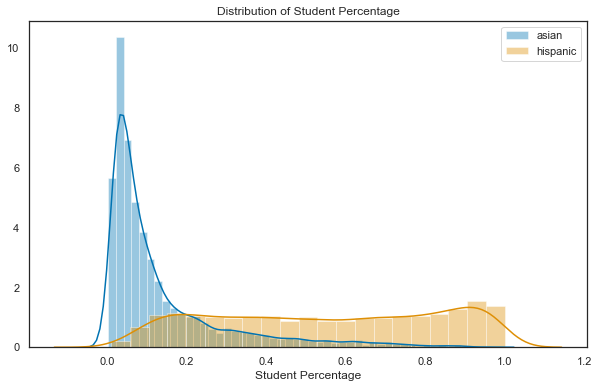

In [143]:
plt.figure(figsize=(10,6))

sns.distplot(asian['fraction_count'])
sns.distplot(hisp['fraction_count'])
plt.legend(['asian','hispanic'])
plt.xlabel('Student Percentage')
plt.title('Distribution of Student Percentage');

# plt.savefig('Data/percentdist.png')

What can you conclude from the visualization above? Do you think this has implications for the academic outcomes of the two student groups? Why do you think such difference exists? There is no right answer--simply use this space as a thinking space of your own.

### Question 7c

Now, we want to find out if there exists a relationship between the student percentage values and average ACT math scores for the two ethnic groups. Do they correlate positively? If so, what further implications does that have?

First, make two dataframe called `asian_act_by_school` and `hisp_act_by_school` indexed by `CDSCode` (containing only schools with both ACT math score and student percentage information). These dataframes contains the fields `student_percentage` and `avg_score` consisting of the student percentage and ACT math score ordered by CDS code.

In [112]:
hisp_act_by_school = hisp.loc[~hisp['AvgScrMath'].isna()]\
                    [['CDSCode','fraction_count','AvgScrMath']]\
                    .set_index('CDSCode')\
                    .rename(columns={'fraction_count':'student_percentage'\
                                    ,'AvgScrMath':'avg_score'})
hisp_act_by_school.head()

,student_percentage,avg_score
CDSCode,,
1.100170e+12,0.563636,20
1.316170e+12,0.518817,15
1.611190e+12,0.093750,27
1.611190e+12,0.126203,26
1.611190e+12,0.161776,23


In [113]:
asian_act_by_school = asian.loc[~asian['AvgScrMath'].isna()]\
                    [['CDSCode','fraction_count','AvgScrMath']]\
                    .set_index('CDSCode')\
                    .rename(columns={'fraction_count':'student_percentage'\
                                    ,'AvgScrMath':'avg_score'})
asian_act_by_school.head()

,student_percentage,avg_score
CDSCode,,
1.316170e+12,0.086022,15
1.611190e+12,0.473958,27
1.611190e+12,0.383701,26
1.611190e+12,0.217288,23
1.611270e+12,0.304795,28


### Question 7d

The tables alone don't do a very good job of clarifying whether or not there is a relationship between racial percentage and average ACT math scores. Depict this relationship using the seaborn library's `boxplot` with ACT scores being on the x-axis and fraction of correponding ethnicity and gender on the y-axis. The code syntax is as follows:

    sns.boxplot(x, y, order)
    
Pay close attention to the order parameter as the labels may not be automatically ordered in the correct way. The parameter should be in the form of a list that contains all of the x-axis values in the right order.

Again, your visualization should look like the following image, with the right title, legend and labels. 

<img src="Data/acthisp.png" style="width:600px">
<img src="Data/actasian.png" style="width:600px">

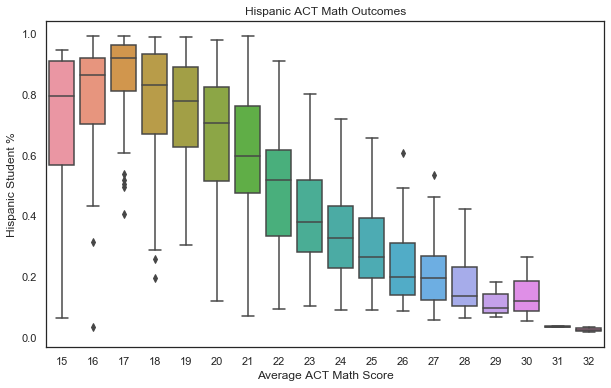

In [144]:
plt.figure(figsize=(10,6))

sns.boxplot(hisp_act_by_school['avg_score'], hisp_act_by_school['student_percentage'], \
                                                order=['15','16','17','18','19',\
                                                       '20','21','22','23','24','25','26',\
                                                       '27','28','29','30','31','32'])
plt.xlabel('Average ACT Math Score')
plt.ylabel('Hispanic Student %')
plt.title("Hispanic ACT Math Outcomes")

# plt.savefig('Data/acthisp.png')

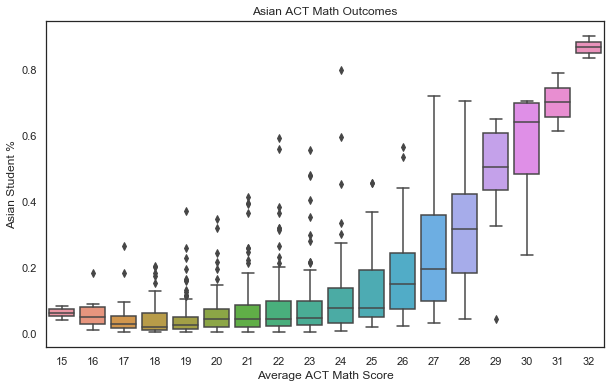

In [145]:
plt.figure(figsize=(10,6))

sns.boxplot(asian_act_by_school['avg_score'], asian_act_by_school['student_percentage'], \
                                                order=['15','16','17','18','19',\
                                                       '20','21','22','23','24','25','26',\
                                                       '27','28','29','30','31','32'])
plt.xlabel('Average ACT Math Score')
plt.ylabel('Asian Student %')
plt.title("Asian ACT Math Outcomes")

# plt.savefig('Data/actasian.png')

### Question 7e

If a higher percentage of Hispanic students correlates with lower average ACT math scores (and a higher percentage of Asian students correlates with higher average ACT math scores), what would you expect to see in the boxplots that you made in question 7d? What do you see?

What implications does the distribution plot you made in question 7b have on the boxplots you made in question 7d? Does this take away from the value of our conclusions? Why or why not?

## Summary of the Demographics Data

What we have learned about the demographics data? What might be some next steps in our investigation? 

* We found that the records are at the gender and ethnicity level and that we have inspections for a single year.   
* By joining the schools and demographics data, we identified the name of the school with the highest average ACT Math scores and optionally the names of the schools with the lowest scores.
* We also examined the relationship between the ethnicity and standardized test scores. Findings may warrant further investigation. 

---
## 8. Demographics and Education in the United States

<img src="Data/ST_2016.06.27_race-inequality-ch1-03-2.png" style="width:400px">

>*"In fact, the U.S. educational system is one of the most unequal in the industrialized world, and students routinely receive dramatically different learning opportunities based on their social status. In contrast to European and Asian nations that fund schools centrally and equally, the wealthiest 10 percent of U.S. school districts spend nearly 10 times more than the poorest 10 percent, and spending ratios of 3 to 1 are common within states. Despite stark differences in funding, teacher quality, curriculum, and class sizes, the prevailing view is that if students do not achieve, it is their own fault. If we are ever to get beyond the problem of the color line, we must confront and address these inequalities." - Brookings Institute*

Although racial differences in student outcomes is a widely known subject, analyzing relevant data gives us an opportunity to look at this issue in more depth. Question 8 is intended to give you an opportunity to think about real world questions that our prior analysis poses. We have already observed that Hispanic student population tend to be heavily concentrated while Asian students receive their education in more racially diverse schools. We have also learned that a higher percentage of Hispanic population leads to lower average ACT math scores while the opposite was true with a higher percentage of Asian students.

### Question 8a

Figure above depicts median income by racial group across the US. You can clearly see that Black and Hispanic citizens tend to receive lower pay compared to their White and Asian peers. Do you think this income gap between racial groups has a significant impact on children's educational outcomes? Is this an interrelated issue where both issues are mutually causing the other? Research the web and come up with one interesting fact you find about the relationship between income and education level.

### Question 8b

Chancellor Carol T. Christ recently launched the [Diversity Initiatives](https://alumni.berkeley.edu/california-magazine/spring-2019/chancellors-letter-diversity-initiatives), which envisions a more diverse demography of students, faculty and staff members across UC Berkeley campus. On the other hand, [Harvard lost a lawsuit regarding affirmative action](https://www.newyorker.com/magazine/2018/10/15/the-rise-and-fall-of-affirmative-action), which now forbids the university from considering a candidate's race during its admission process. Discuss what you believe is the right thing to do. Should individual accomplishment be assessed with context to their socioeconomic status? Or do you believe this is unjust?

### Question 8c

What are some other interventions that that you can think of to remedy this situation? Find one example of a government intervention intended to solve this issue, and discuss whether or not the intervention was effective. 

## Congratulations!

You are finished with Project 1. You'll need to make sure that your PDF exports correctly to receive credit. Run the following cell and follow the instructions.